In [152]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# The Survey Related Plots Created In This Script  
## 2 dictionary crated. One of them contains the question and the other one has the answers. 


In [153]:
# The dataset called here 
survey_data=pd.read_csv('survey_nonvote.txt').fillna(method='ffill')

In [154]:
survey_data.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,1.0,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,1.0,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,1.0,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,1.0,1.0,81,High school or less,White,Male,$40-75k,always
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,477662,1.1916,1,1,3,1,3,1,2,2,...,2,1.0,1.0,2.0,27,Some college,Hispanic,Male,$40-75k,always
5832,477663,1.4623,1,1,1,1,2,1,2,1,...,2,1.0,2.0,2.0,59,High school or less,White,Female,$125k or more,rarely/never
5833,488322,0.9252,1,1,2,1,3,1,1,2,...,2,1.0,1.0,2.0,51,College,Other/Mixed,Male,$125k or more,sporadic
5834,488325,2.6311,1,2,2,2,2,2,2,2,...,3,1.0,1.0,1.0,22,High school or less,Black,Female,Less than $40k,always


In [155]:
# A dictionary created which contains the potantional answers  
answers_file=open('answers_sur.txt','r')
answers_lines=answers_file.readlines()
dictionary_ans=dict()

list_qNum=['0']
for line in answers_lines:
    if line[0]=='Q':
        list_qNum.append(line[1:].replace('\n',''))

key_tra=''
count=0
val_lines=''
for line in answers_lines:
    if line[0]=='Q':
        dictionary_ans['Q'+list_qNum[count]]=val_lines
        count=count+1
        key_tra=line
        val_lines=''
    else:
        val_lines=val_lines+line
dictionary_ans['Q'+list_qNum[count]]=val_lines

In [156]:
print(dictionary_ans['Q4'])


1. A significant impact
2. Somewhat of an impact
3. Just a slight impact
4. No impact at all



In [157]:
# The creating the dictionary for questions. 
question_file=open('questions.txt','r')
question_lines=question_file.readlines()
dictionary_question=dict()
count=0

list_qNum=[]
for x in range(len(question_lines)-2):
    if question_lines[x][0]=='Q' and question_lines[x+1][0]=='Q':
        qnum=question_lines[x][:4].replace('.','').replace(' ','')
        list_qNum.append(qnum)
        dictionary_question[qnum]=question_lines[x]
    elif question_lines[x+1][0]!='Q':
        flag_num=question_lines[x][:4].replace('.','').replace(' ','')
        t=str(flag_num+'_'+ question_lines[x+1][:3].replace('.','').replace(' ',''))
        list_qNum.append(t)
        dictionary_question[t]=str(question_lines[x]+question_lines[x+1])

In [158]:
dictionary_question

{'Q1': 'Q1. Are you a U.S. citizen?\n',
 'Q2_1': 'Q2. In your view, how important are each of the following to being a good American?\n1. Voting in elections\n',
 'Q2_2': 'Q2. In your view, how important are each of the following to being a good American?\n2. Serving on a jury\n',
 'Q2_3': 'Q2. In your view, how important are each of the following to being a good American?\n3. Following what happens in government and politics\n',
 'Q2_4': 'Q2. In your view, how important are each of the following to being a good American?\n4. Displaying the American flag\n',
 'Q2_5': 'Q2. In your view, how important are each of the following to being a good American?\n5. Participating in the U.S. Census every ten years\n',
 'Q2_6': 'Q2. In your view, how important are each of the following to being a good American?\n6. Knowing the Pledge of Allegiance\n',
 'Q2_7': 'Q2. In your view, how important are each of the following to being a good American?\n7. Supporting the military\n',
 'Q2_8': 'Q2. In your v

In [160]:
set(survey_data['voter_category'])

{'always', 'rarely/never', 'sporadic'}

# The dictionaries: 
-question_ans: takes the column name and potantional answers
    
-dictionary_ans: takes the column name and gives the question  

In [161]:
q1_df = survey_data[survey_data['Q1'].notna()]
q1_df=q1_df[q1_df['voter_category'].notna()]
q1_df['voter_category']=q1_df['voter_category'].astype('category').cat.codes


for x in list(q1_df.columns):
    print(x)
    print(q1_df['voter_category'].corr(q1_df[x]))

RespId
0.06888940083025291
weight
0.02755439397767862
Q1
nan
Q2_1
0.012114151947774937
Q2_2
0.03739607989143196
Q2_3
0.04648488192945407
Q2_4
-0.00023275015548241188
Q2_5
0.03079691624461622
Q2_6
0.010753153027004107
Q2_7
-0.006457319432699147
Q2_8
0.000875797307047829
Q2_9
-0.0161240847002271
Q2_10
-0.013050101330315493
Q3_1
-0.011383135482910077
Q3_2
-0.007940330711381083
Q3_3
-0.03267502068991268
Q3_4
-0.050682962197444746
Q3_5
-0.0444608692311326
Q3_6
0.012051518405278672
Q4_1
0.025215876652143067
Q4_2
0.03746790439524124
Q4_3
0.03795555488349515
Q4_4
0.030675051683456855
Q4_5
0.029829547970859138
Q4_6
0.027683123067692463
Q5
0.02747893786210429
Q6
0.04222714372698264
Q7
-0.049608855970153694
Q8_1
0.010834574763769826
Q8_2
0.02474715953558672
Q8_3
0.01591460177235905
Q8_4
0.040388775859744985
Q8_5
0.04647340833183228
Q8_6
0.03302565870350363
Q8_7
0.030358317955711
Q8_8
0.040225834926689956
Q8_9
0.040931764069473985
Q9_1
0.02599265457192282
Q9_2
-0.04571608073531771
Q9_3
-0.04821984

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
dictionary_question['Q19_9']

'Q19. Which of the following do you think would get more people to vote in national elections?\n9. Having more candidates to choose from\n'

In [ ]:
q19_columns=[]
for x in range(1,10):

    q19_columns.append(dictionary_question['Q19_'+str(x)].split('\n')[1][2:])

In [162]:
survey_data.groupby(['Q19_'+str(9),'voter_category']).count()['RespId']

Q19_9  voter_category
-1     always            1465
       rarely/never      1012
       sporadic          1943
 1     always             346
       rarely/never       439
       sporadic           631
Name: RespId, dtype: int64

In [163]:
survey_data.groupby(['Q19_'+str(x),'voter_category'])

KeyError: 'Q19_educ'

In [178]:
q19_ans_3=np.zeros([3,9])
q19_ans_1=np.zeros([9,1])
survey_data.groupby(['Q19_10']).count()['RespId'].values[0]

for x in range(1,10):
    q19_ans_1[x-1]=survey_data.groupby(['Q19_'+str(x)]).count()['RespId'].values[1]/(survey_data.groupby(['Q19_'+str(x)]).count()['RespId'].values[0]+survey_data.groupby(['Q19_'+str(x)]).count()['RespId'].values[1])
    for t in range(3):
        q19_ans_3[t,x-1]=survey_data.groupby(['Q19_'+str(x),'voter_category']).count()['RespId'].values[t+3]/(survey_data.groupby(['Q19_'+str(x),'voter_category']).count()['RespId'].values[t+3]+survey_data.groupby(['Q19_'+str(x),'voter_category']).count()['RespId'].values[t])
    dictionary_question['Q19_'+str(x)]


In [221]:
df_q19_3=pd.DataFrame(q19_ans_3,columns=q19_columns,index=['Always','Never','Sporadic'])


In [233]:
df_q19_3.loc['Never'].sort_values

<bound method Series.sort_values of  More outreach to ordinary Americans from candidates or elected officials    0.248105
 More information about the candidates from unbiased sources                 0.458994
 Making Election Day a national holiday                                      0.485872
 Being automatically registered to vote                                      0.383184
 Automatically receiving a ballot in the mail                                0.376981
 Being able to vote in-person before Election Day                            0.416265
 Being able to register and vote on the same day                             0.382495
 Being able to vote by phone or online                                       0.339766
 Having more candidates to choose from                                       0.302550
Name: Never, dtype: float64>

In [235]:
df_q19_1=pd.DataFrame(df_q19_3.loc['Never'].sort_values(),index=q19_columns)

In [181]:
df_q19_1.sort_values(0, ascending=False)

,0
Being able to vote in-person before Election Day,0.536498
Making Election Day a national holiday,0.524160
More information about the candidates from unbiased sources,0.517135
Automatically receiving a ballot in the mail,0.402330
Being automatically registered to vote,0.383310
Being able to register and vote on the same day,0.374914
More outreach to ordinary Americans from candidates or elected officials,0.290781
Being able to vote by phone or online,0.285984
Having more candidates to choose from,0.242632


In [222]:
df_q19_3.loc['Never']

 More outreach to ordinary Americans from candidates or elected officials    0.248105
 More information about the candidates from unbiased sources                 0.458994
 Making Election Day a national holiday                                      0.485872
 Being automatically registered to vote                                      0.383184
 Automatically receiving a ballot in the mail                                0.376981
 Being able to vote in-person before Election Day                            0.416265
 Being able to register and vote on the same day                             0.382495
 Being able to vote by phone or online                                       0.339766
 Having more candidates to choose from                                       0.302550
Name: Never, dtype: float64

In [218]:
plt.rcParams.update({'font.size': 32})

plt.figure(figsize=[7,7])
sns.heatmap(df_q19_3.loc['Never'],cmap='Purples',annot=True)


IndexError: Inconsistent shape between the condition and the input (got (9, 1) and (9,))

<Figure size 504x504 with 0 Axes>

In [203]:
q19_high_tolow_index=df_q19_1.sort_values(0, ascending=False)

In [204]:
df_q19_3[q19_high_tolow_index]

,More outreach to ordinary Americans from candidates or elected officials,More information about the candidates from unbiased sources,Making Election Day a national holiday,Being automatically registered to vote,Automatically receiving a ballot in the mail,Being able to vote in-person before Election Day,Being able to register and vote on the same day,Being able to vote by phone or online,Having more candidates to choose from
Always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sporadic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

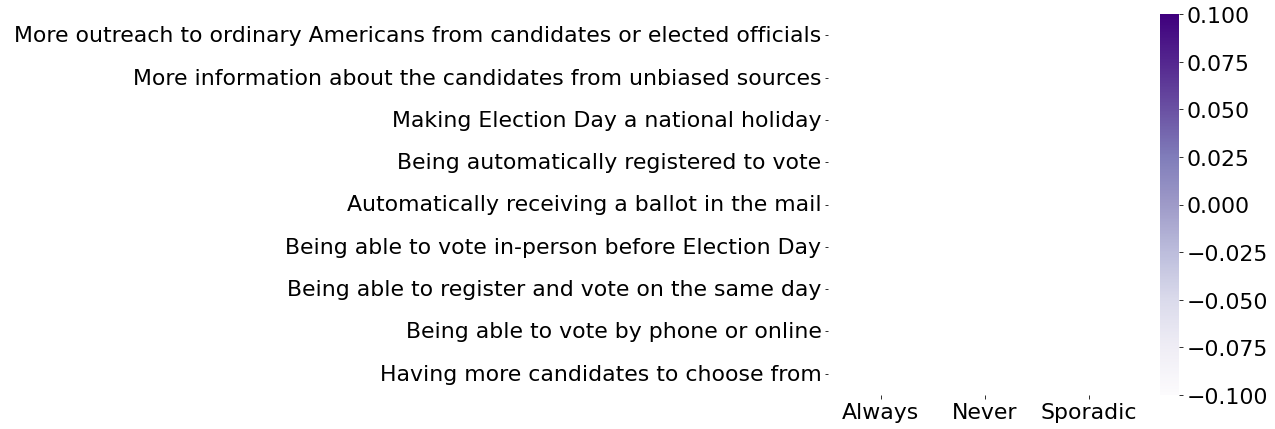

In [225]:
df_q19_3[q19_high_tolow_index].values[1,:]
plt.figure(figsize=[7,7])
plt.rcParams.update({'font.size': 22})

sns.heatmap(df_q19_3[q19_high_tolow_index].T,cmap='Purples',annot=True)

<AxesSubplot:>

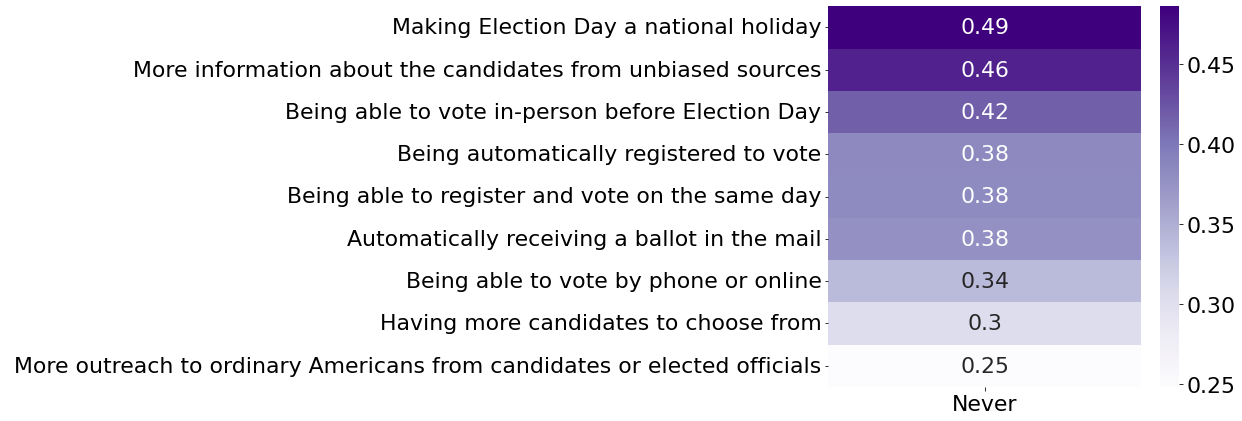

In [241]:
plt.figure(figsize=[7,7])
plt.rcParams.update({'font.size': 22})

sns.heatmap(df_q19_1.sort_values(by="Never", ascending=False),cmap='Purples',annot=True)